In [82]:
import os
import json
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [83]:
def extract_nodes(test_file):
    match = re.search(r'test_file_(\d+)', test_file)
    return int(match.group(1)) if match else None

In [84]:
def load_results(directory):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            with open(os.path.join(directory, filename), 'r') as f:
                data = json.load(f)
                
                # Assuming 'algorithm_name' can be derived from the filename
                algorithm = filename.replace('.json', '')

                for entry in data:
                    test_file = entry.get('test_name')
                    order_of_tasks = entry.get('order_of_tasks')
                    finish_time = entry.get('finish_time')
                    time_taken = entry.get('time_taken')
                    
                    nodes = extract_nodes(test_file)
                    
                    if nodes is None:
                        print(f"Skipping entry in file {filename}: couldn't extract nodes.")
                        continue
                    
                    # Handle the case where no solution was found
                    no_solution = (order_of_tasks == "Found none")

                    if algorithm not in results:
                        results[algorithm] = []
                    
                    results[algorithm].append({
                        'nodes': nodes,
                        'finish_time': finish_time,
                        'time_taken': time_taken,
                        'no_solution': no_solution
                    })
    return results

In [85]:
def apply_jitter(values, jitter_amount=0.1):
    return [val + np.random.uniform(-jitter_amount, jitter_amount) for val in values]

In [121]:
def plot_results(results, directory_name, big_data=False):
    # Create directory for results if it doesn't exist
    output_dir = 'result_plots'
    os.makedirs(output_dir, exist_ok=True)
    
    # Create a figure for the plots
    plt.figure(figsize=(14, 8))

    # Plot finish time vs nodes
    plt.subplot(1, 2, 1)
    for algorithm, data in results.items():
        nodes = apply_jitter([entry['nodes'] for entry in data])
        finish_times = [entry['finish_time'] if not entry['no_solution'] else None for entry in data]
        no_solution_indices = [i for i, entry in enumerate(data) if entry['no_solution']]
        
        # Plot normal finish times
        plt.plot(nodes, finish_times, marker='o', label=algorithm)
        
        # Plot X's where no solution was found
        if no_solution_indices:
            plt.scatter(
                [nodes[i] for i in no_solution_indices],
                [finish_times[i] for i in no_solution_indices],  # Use actual finish time values for X's
                color='red', marker='x', s=100, label=f'{algorithm} (no solution)'
            )
    
    plt.xlabel('Number of Nodes')
    plt.ylabel('Finish Time')
    plt.title('Finish Time vs Number of Nodes')
    plt.legend()
    plt.grid(True)
    
    # Conditionally zoom in on the range 37 to 55 for big data
    if big_data:
        plt.ylim(37, 55)  # Further zoomed-in range
        plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))  # Set intervals to 1
        plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(4))  # Minor ticks for finer granularity
        plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))  # Format as integer
    else:
        plt.gca().yaxis.set_major_locator(ticker.AutoLocator())  # Automatically adjust tick locations
        plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(5))  # Minor ticks for finer granularity
        plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))  # Format as integer
    
    # Set x-axis to display only integers
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Save the plot
    finish_time_plot_filename = f'finish_time_vs_nodes_{directory_name}.png'
    plt.savefig(os.path.join(output_dir, finish_time_plot_filename))
    
    # Plot time taken vs nodes
    plt.subplot(1, 2, 2)
    for algorithm, data in results.items():
        nodes = apply_jitter([entry['nodes'] for entry in data])
        times_taken = [entry['time_taken'] if not entry['no_solution'] else None for entry in data]
        no_solution_indices = [i for i, entry in enumerate(data) if entry['no_solution']]
        
        # Plot normal times taken
        plt.plot(nodes, times_taken, marker='o', label=algorithm)
        
        # Plot X's where no solution was found
        if no_solution_indices:
            plt.scatter(
                [nodes[i] for i in no_solution_indices],
                [0 for _ in no_solution_indices],  # Plot X's at y=0 (or adjust as needed)
                color='red', marker='x', s=100, label=f'{algorithm} (no solution)'
            )

    plt.xlabel('Number of Nodes')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Number of Nodes')
    plt.legend()
    plt.grid(True)
    
    # Set x-axis to display only integers
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Save the plot
    time_taken_plot_filename = f'time_taken_vs_nodes_{directory_name}.png'
    plt.savefig(os.path.join(output_dir, time_taken_plot_filename))

    plt.tight_layout()
    plt.show()

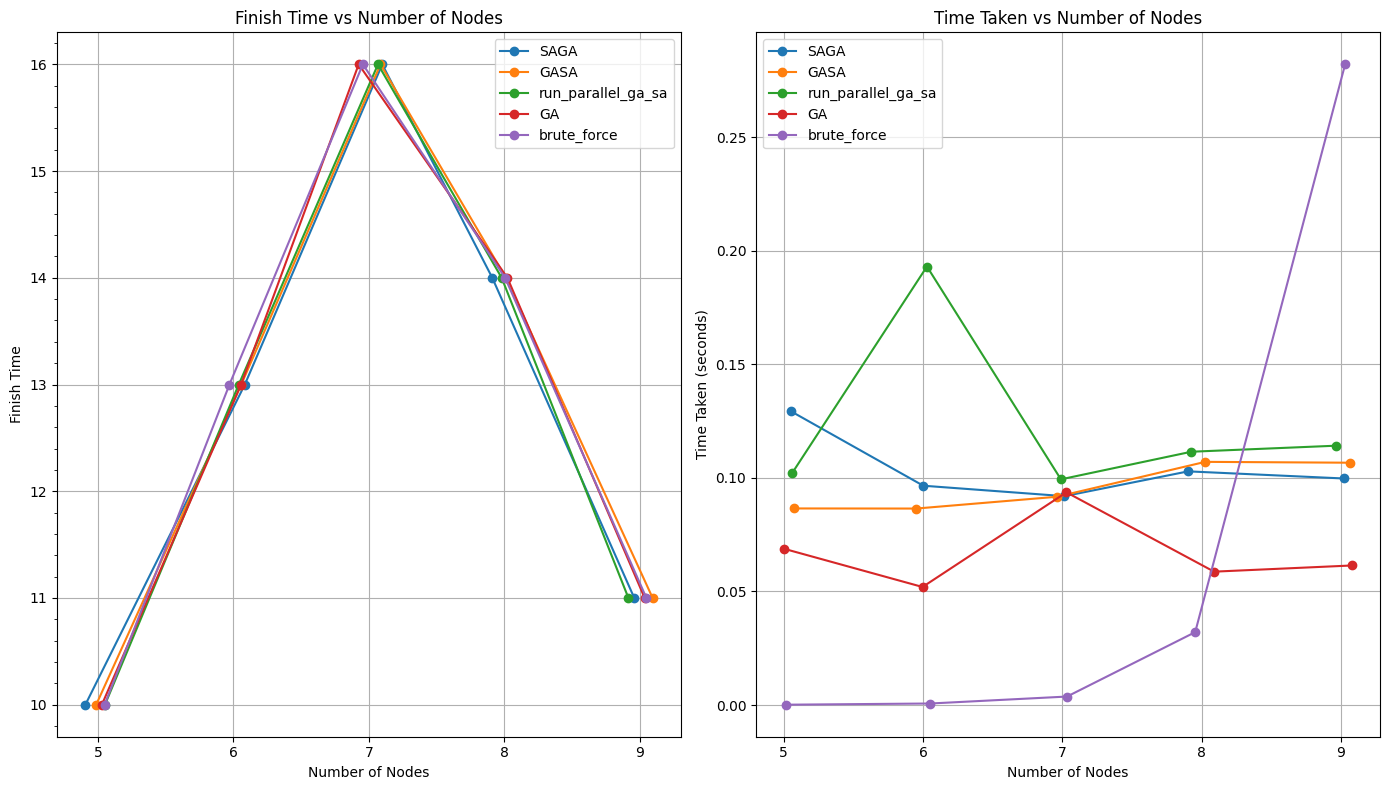

In [127]:
directory = 'small_data/'
results = load_results(directory)
plot_results(results, 'small_data')

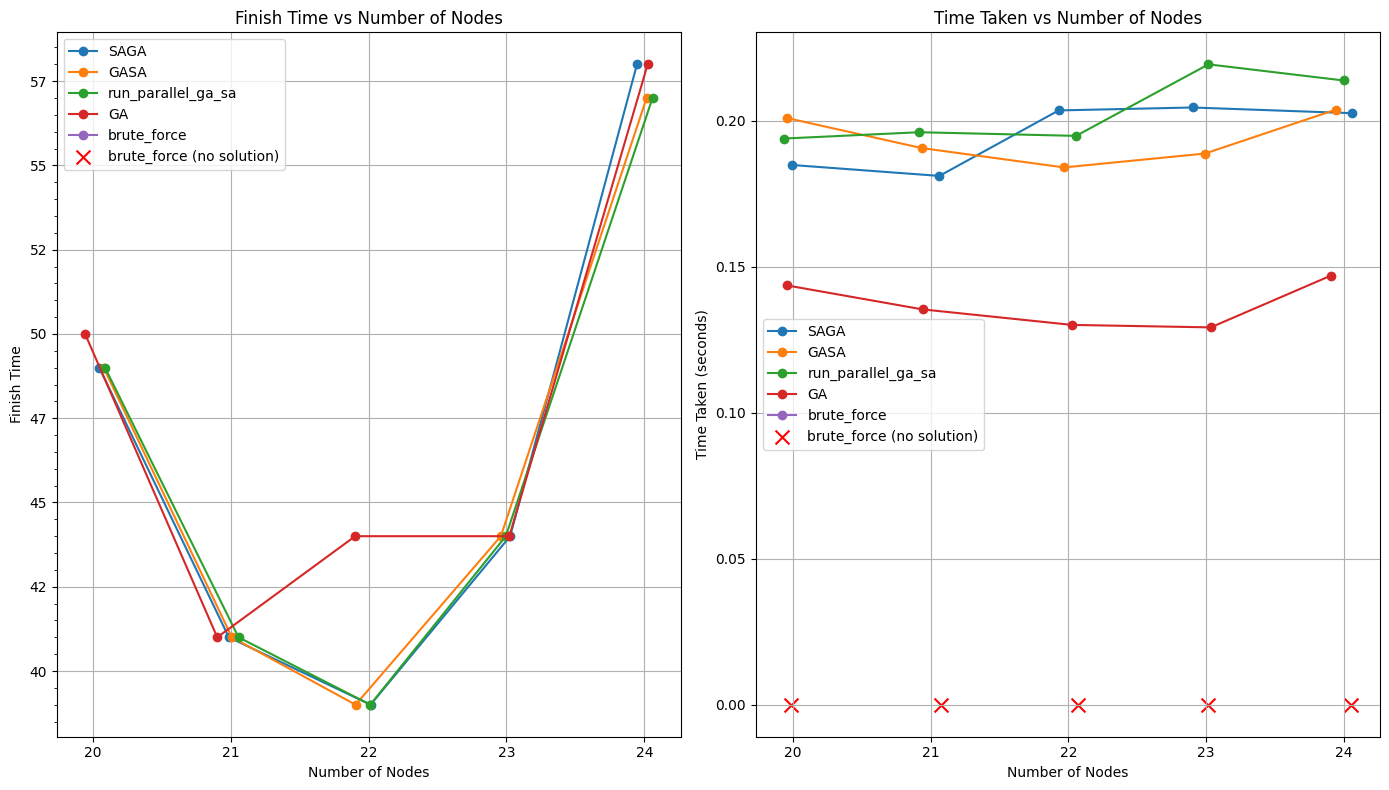

In [128]:
directory = 'big_data/'
results = load_results(directory)
plot_results(results, 'big_data')